In [1]:
%pip install requests pandas numpy matplotlib seaborn cvxpy openpyxl scikit-learn SyntheticControlMethods

# Make sure that the scipy version is 1.4.1 for the SyntheticControlMethods package
%pip uninstall scipy -y
%pip install scipy==1.4.1

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


Successfully retrieved data using the IMF Data API
BS.ENDE_XDC_USD_RATE has 55 observations
BZ.ENDE_XDC_USD_RATE has 55 observations
TT.ENDE_XDC_USD_RATE has 55 observations
BS.PCPI_IX has 55 observations
DM.ENDE_XDC_USD_RATE has 55 observations
TT.PCPI_IX has 55 observations
BZ.PCPI_IX has 55 observations
DM.PCPI_IX has 55 observations
TT.FITB_PA has 55 observations
BZ.FISR_PA has 55 observations
TT.FISR_PA has 40 observations
DM.FISR_PA has 55 observations
TT.FILR_PA has 55 observations
BS.FISR_PA has 55 observations
DM.FILR_PA has 55 observations
DM.FITB_PA has 34 observations
BZ.FITB_PA has 55 observations
TT.FPOLM_PA has 40 observations
BS.FITB_PA has 55 observations
BS.FIDR_PA has 55 observations
BS.FPOLM_PA has 55 observations
BZ.FILR_PA has 55 observations
BZ.FPOLM_PA has 55 observations
DM.FIDR_PA has 55 observations
TT.FIDR_PA has 52 observations
BZ.FIDR_PA has 55 observations
BS.FILR_PA has 55 observations
BS.NGDP_NSA_XDC has 32 observations
TT.NGDP_NSA_XDC has 45 observatio

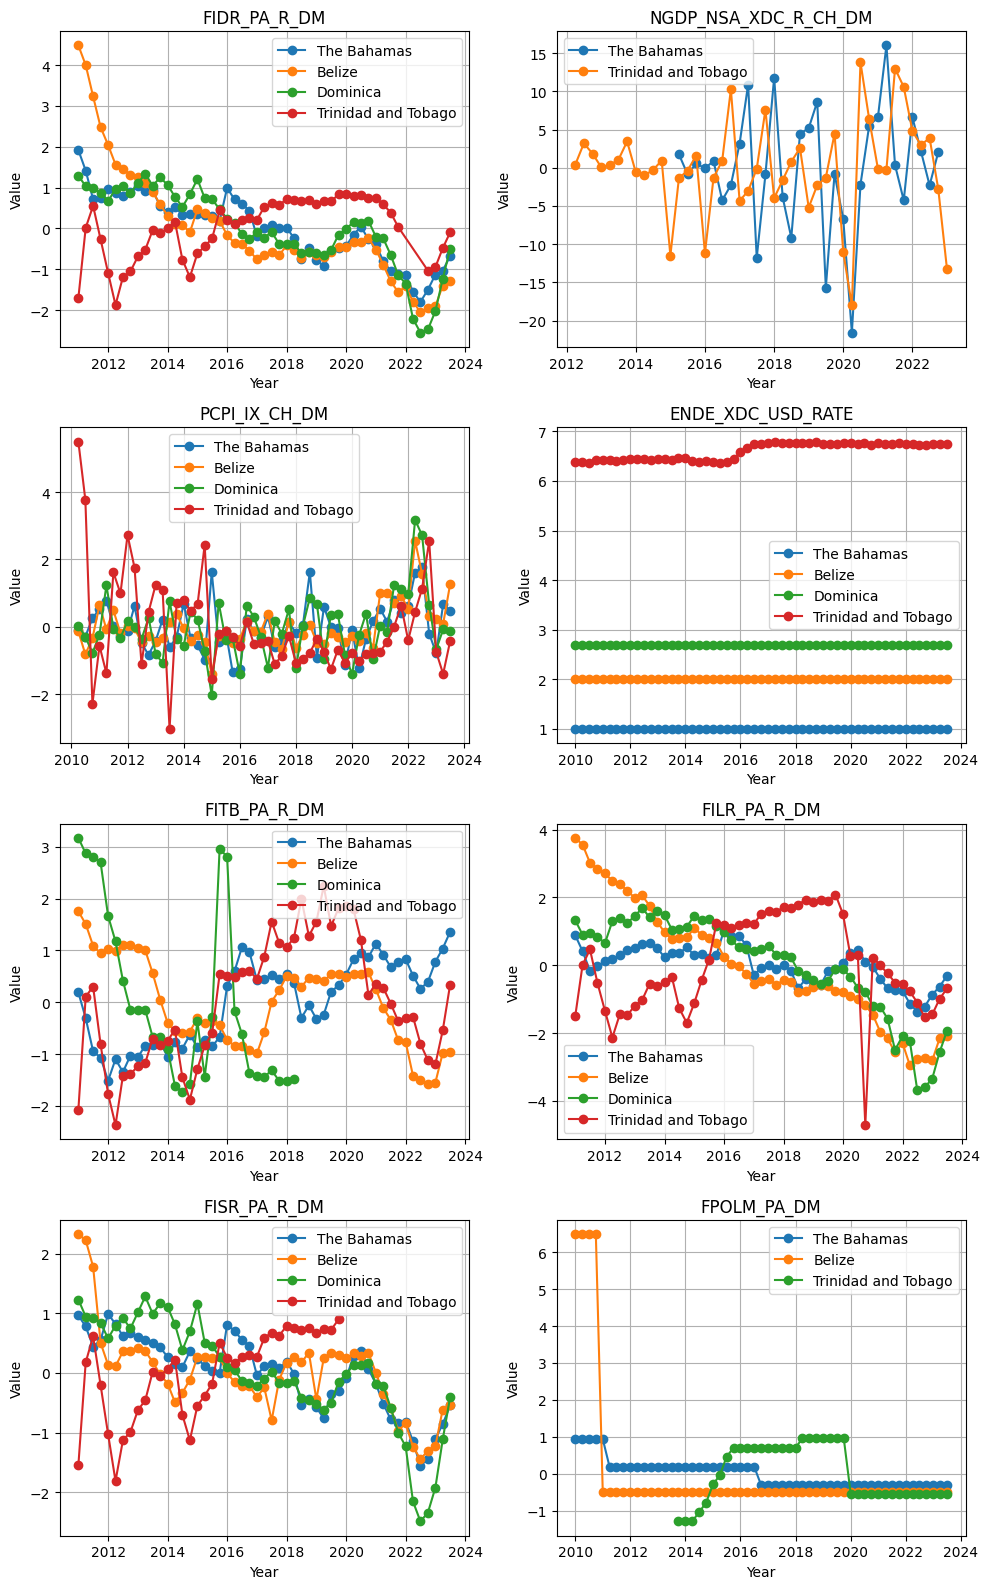

In [59]:
import requests
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

COUNTRY_NAME = {
    'BS': 'The Bahamas',
    'AG': 'Antigua and Barbuda',
    'BB': 'Barbados',
    'BZ': 'Belize',
    'DM': 'Dominica',
    'FJ': 'Fiji',
    'GD': 'Grenada',
    'MU': 'Mauritius',
    'TT': 'Trinidad and Tobago',
    'VC': 'Saint Vincent and the Grenadines',
    'BH': 'Bahrain',
    'DJ': 'Djibouti',
    'PA': 'Panama',
    'HT': 'Haiti',
    'KN': 'Saint Kitts and Nevis',
    'LC': 'Saint Lucia',
    'JM': 'Jamaica',
    'DO': 'Dominican Republic',
    'PR': 'Puerto Rico',
    'MV': 'Maldives',
    'TO': 'Tonga',
    'WS': 'Samoa',
    'CY': 'Cyprus',
    'MT': 'Malta',
    'SC': 'Seychelles',
    'CV': 'Cape Verde',
    'HK': 'Hong Kong',
    ########################################
    'NG': 'Nigeria',
    'KE': 'Kenya',
    'GH': 'Ghana',
    'CI': 'Cote d\'Ivoire',
    'SN': 'Senegal',
    'ET': 'Ethiopia',
    'BD': 'Bangladesh',
    'VT': 'Vietnam',
    'PH': 'Philippines',
    'PK': 'Pakistan',
    'ID': 'Indonesia',
    'CM': 'Cameroon',
    'TZ': 'Tanzania',
    'RW': 'Rwanda',
    'UG': 'Uganda',
    'MZ': 'Mozambique',
    'ZM': 'Zambia',
    'ZW': 'Zimbabwe',
    "EG": "Egypt",
    "ZA": "South Africa",
    "DZ": "Algeria",
    "MA": "Morocco",
    "AO": "Angola",
    "CD": "Democratic Republic of the Congo",
    "TN": "Tunisia",
    "LY": "Libya",
    "SD": "Sudan",
    "GN": "Guinea",
    "ML": "Mali",
    "BF": "Burkina Faso",
    "BW": "Botswana",
    "BJ": "Benin",
    "GA": "Gabon",
    "NE": "Niger",
    "MG": "Madagascar",
    "CG": "Republic of the Congo",
    "MW": "Malawi",
    "NA": "Namibia",
    "TD": "Chad",
    "SO": "Somalia",
    "MR": "Mauritania",
    "GQ": "Equatorial Guinea",
    "TG": "Togo",
    "SS": "South Sudan",
    "LR": "Liberia",
    "SL": "Sierra Leone",
    "BI": "Burundi",
    "CF": "Central African Republic",
    "GM": "The Gambia",
    "GW": "Guinea-Bissau",
    "ER": "Eritrea",
    "KM": "Comoros"
}

### GLOBAL VARIABLES

FREQUENCY = 'Q' # 'M' for monthly, 'Q' for quarterly, 'A' for annual
START_PERIOD = '2010' if FREQUENCY == 'A' else '2010-Q1'
END_PERIOD = '2023' if FREQUENCY == 'A' else '2023-Q3'

# The Bahamas
TREATMENT_UNIT = 'BS'

# Yearly - Interest rates and Central Bank
# CONTROL_UNITS = [
#     'BZ', 'DM', 'GD', 'KN', 'TT',
#     'JM', 'FJ', 'CV', 'AG', 'BB'
# ]

# # Yearly - Interest rates, no Central Bank Policy Rate
# CONTROL_UNITS = [
#     'AG', 'BB', 'BZ', 'DM', 'GD',
#     'KN', 'TT', 'JM', 'FJ', 'CV'
# ]

# Quarterly - Interest rates and Central Bank
CONTROL_UNITS = [
    'AG', 'BB', 'BZ', 'DM', 'FJ',
    'GD', 'MU', 'TT', 'VC', 'HK',
    'KN', 'LC', 'JM', 'DO', 'MV',
    'WS', 'SC'
]

# CONTROL_UNITS = [
#     'BZ', 'DM', 'TT'
# ]

# # Nigeria
# TREATMENT_UNIT = 'NG'

# # Without interest rates
# CONTROL_UNITS = [
#     'KE', 'GH', 'BD', 'ID', 'RW',
#     'MZ', 'EG', 'ZA', 'DZ', 'MA',
#     'AO', 'CD', 'GN', 'BF', 'BW',
#     'BJ', 'MG', 'MU', 'NA', 'SL',
#     'CV', 'SC', 'KM'
# ]

# With interest rates
# CONTROL_UNITS = [
#     'KE', 'GH', 'BD', 'EG', 'ZA',
#     'AO', 'MU', 'SL', 'CV'
# ]

# # With interest rates, no Central Bank
# CONTROL_UNITS = [
#     'KE', 'GH', 'BD', 'RW',
#     'MZ', 'EG', 'ZA', 'DZ',
#     'AO', 'MG', 'MU', 'NA',
#     'SL', 'CV', 'SC'
# ]

# Quarterly - With interest rates, no Central Bank
# CONTROL_UNITS = [
#     'KE', 'GH', 'RW',
#     'EG', 'ZA', 'DZ',
#     'MU', 'NA', 'SC'
# ]

COUNTRIES = [TREATMENT_UNIT] + CONTROL_UNITS

COUNTRY_CODE = {country: index for index, country in enumerate(COUNTRIES, start=1)}

# IMF Data API Indicator Codes
GDP = 'NGDP_XDC' if FREQUENCY == 'A' else 'NGDP_NSA_XDC'
CPI = 'PCPI_IX'
EXCHANGE_RATE = 'ENDE_XDC_USD_RATE'
POLICY_RATE = 'FPOLM_PA'
SAVINGS_RATE = 'FISR_PA'
LENDING_RATE = 'FILR_PA'
DEPOSITS_RATE = 'FIDR_PA'
TREASURY_BILL_RATE = 'FITB_PA'

REAL_GDP = GDP + "_R"
REAL_SAVINGS_RATE = SAVINGS_RATE + "_R"
REAL_LENDING_RATE = LENDING_RATE + "_R"
REAL_DEPOSITS_RATE = DEPOSITS_RATE + "_R"
REAL_TB_RATE = TREASURY_BILL_RATE + "_R"

INFLATION_RATE = CPI + "_CH"
REAL_GDP_GROWTH_RATE = REAL_GDP + "_CH"

DEMEAN_REAL_SAVINGS_RATE = REAL_SAVINGS_RATE + "_DM"
DEMEAN_REAL_LENDING_RATE = REAL_LENDING_RATE + "_DM"
DEMEAN_REAL_DEPOSITS_RATE = REAL_DEPOSITS_RATE + "_DM"
DEMEAN_REAL_TB_RATE = REAL_TB_RATE + "_DM"
DEMEAN_REAL_GDP_GROWTH_RATE = REAL_GDP_GROWTH_RATE + "_DM"
DEMEAN_INFLATION_RATE = INFLATION_RATE + "_DM"
DEMEAN_EXCHANGE_RATE = EXCHANGE_RATE + "_DM"
DEMEAN_POLICY_RATE = POLICY_RATE + "_DM"

OUTPUT = DEMEAN_REAL_DEPOSITS_RATE
INPUTS = [
    DEMEAN_REAL_GDP_GROWTH_RATE,
    DEMEAN_INFLATION_RATE,
    EXCHANGE_RATE,
    DEMEAN_REAL_TB_RATE,
    DEMEAN_REAL_LENDING_RATE,
    DEMEAN_REAL_SAVINGS_RATE,
    DEMEAN_POLICY_RATE
]

IMF_INDICATORS = [DEPOSITS_RATE, GDP, CPI, EXCHANGE_RATE, TREASURY_BILL_RATE, LENDING_RATE, SAVINGS_RATE, POLICY_RATE]
IMF_INDICATORS_KEY = '+'.join(IMF_INDICATORS)
IMF_COUNTRIES_KEY = '+'.join(COUNTRIES)

# IMF DATA API
KEY = f'CompactData/IFS/{FREQUENCY}.{IMF_COUNTRIES_KEY}.{IMF_INDICATORS_KEY}?startPeriod={START_PERIOD}&endPeriod={END_PERIOD}'
URL = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
REQUEST_URL = f'{URL}{KEY}'


### FUNCTIONS

def calculate_growth_rate(values):
    """Calculate the year-over-year growth rate, handling NaN values.
    The first year will have a NaN growth rate since there is no previous year to compare to.

    :param values: List of values
    :return: List of growth rates, with NaN for missing or invalid values
    """
    growth_rates = [np.nan]  # Initialize with NaN since the first year does not have a previous year to compare to.
    for i in range(1, len(values)):
        # Calculate growth rate only if both current and previous values are not NaN.
        if not np.isnan(values[i]) and not np.isnan(values[i-1]) and values[i-1] != 0:
            growth_rate = ((values[i] - values[i-1]) / values[i-1]) * 100
        else:
            growth_rate = np.nan
        growth_rates.append(growth_rate)
    return growth_rates

def convert_to_decimal(date_str):
    """
    Convert a date string in the format 'YYYY-QX' to a decimal number.
    E.g., '2010-Q1' will be converted to 2010.0, '2010-Q2' to 2010.25, etc.
    """
    year_part, quarter_part = date_str.split('-Q')
    year_part = int(year_part)
    quarter_part = float(quarter_part)
    return year_part + (quarter_part - 1) / 4.0

def calculate_moving_average(values, window=4):
    """
    Calculate the moving average for a given list of values.

    :param values: List of tuples (time, value)
    :param window: The number of periods over which to calculate the moving average
    :return: List of tuples (time, moving_average)
    """
    ma_values = []
    # Convert list of tuples to a dictionary for easier manipulation
    value_dict = dict(values)
    times = [time for time, _ in values]

    for i in range(window - 1, len(times)):
        # Calculate average of the window
        window_values = [value_dict[times[j]] for j in range(i-window+1, i+1) if times[j] in value_dict]
        if len(window_values) == window:
            average = sum(window_values) / window
        else:
            average = np.nan  # Assign NaN if the window is not full (e.g., beginning periods)
        ma_values.append((times[i], average))

    return ma_values

def convert_nominal_to_real(indicator, nominal_values, inflation_rates, base_index=100):
    """
    Converts nominal values to real values using the moving average of the Consumer Price Index (CPI).

    :param indicator: The indicator for which to convert nominal values to real values (e.g., NGDP_XDC, FITB_PA)
                      Different indicators have different formulas for calculating real values.
    :param nominal_values: List of tuples (time, nominal_value)
    :param inflation_rates: List of tuples (time, inflation_rate)
    :param base_index: The index value of the base year (usually 100)
    :return: List of tuples (time, real_value)
    """
    # First, calculate the moving average for the CPI
    ma_inflation_rates = calculate_moving_average(inflation_rates, window=4)
    inflation_rates_dict = dict(ma_inflation_rates)  # Convert list of tuples to a dictionary

    real_values = []
    for time, nominal_value in nominal_values:
        if time in inflation_rates_dict and inflation_rates_dict[time] != 0:
            inflation_rate = inflation_rates_dict[time]
            if indicator == GDP:
                real_value = (nominal_value / (1 + inflation_rate/100)) * base_index
            elif indicator in [TREASURY_BILL_RATE, LENDING_RATE, SAVINGS_RATE, DEPOSITS_RATE]:
                real_value = nominal_value - inflation_rate
            else:
                print(f"ERROR: Indicator {indicator} not supported for real value calculation.")
                real_value = np.nan
        else:
            real_value = np.nan  # Assign NaN if no corresponding CPI value or CPI is zero
        real_values.append((time, real_value))

    return real_values


### GET DATA FROM IMF DATA API

try:
    response = requests.get(REQUEST_URL)
except Exception as e:
    print("Failed to retrieve data using the IMF Data API; Error:", e)
    sys.exit()
if response.status_code != 200:
    print(f"Failed to retrieve data using the IMF Data API; Response code: {response.status_code}")
    sys.exit()

print("Successfully retrieved data using the IMF Data API")

data = {}
for country in COUNTRIES:
    data[country] = {}

try:
    series = response.json()['CompactData']['DataSet']['Series']

    for s in series:
        country = s['@REF_AREA']
        indicator = s['@INDICATOR']

        if 'Obs' not in s:
            print(f"No data found for {country}.{indicator}")
            continue

        print(f"{country}.{indicator} has {len(s['Obs'])} observations")

        observations = s['Obs']
        times = [obs.get('@TIME_PERIOD') for obs in observations]
        values = [float(obs.get('@OBS_VALUE')) if obs.get('@OBS_VALUE') else np.nan for obs in observations]

        data[country][indicator] = list(zip(times, values))
except Exception as e:
    print("Failed to process data; Error:", e)
    sys.exit()


### REFINE DATA

# Calculate the inflation rate
for country in COUNTRIES:
    times = [obs[0] for obs in data[country][CPI]]
    values = calculate_growth_rate([obs[1] for obs in data[country][CPI]])
    data[country][INFLATION_RATE] = list(zip(times, values))

# Calculate the real values for GDP, Treasury Bills, Savings Rate, Lending Rate, Deposits Rate
# This is an approximation using the moving average of the inflation rate
for indicator in [DEPOSITS_RATE, GDP, TREASURY_BILL_RATE, LENDING_RATE, SAVINGS_RATE]:
    for country in COUNTRIES:
        if indicator in data[country]:
            data[country][indicator + '_R'] = convert_nominal_to_real(indicator, data[country][indicator], data[country][INFLATION_RATE])

# Calculate the GDP growth rate
for country in COUNTRIES:
    if REAL_GDP in data[country]:
        times = [obs[0] for obs in data[country][REAL_GDP]]
        values = calculate_growth_rate([obs[1] for obs in data[country][REAL_GDP]])
        data[country][REAL_GDP_GROWTH_RATE] = list(zip(times, values))

# Demean the data
for country in COUNTRIES:
    for indicator in [REAL_DEPOSITS_RATE, REAL_GDP_GROWTH_RATE, INFLATION_RATE, EXCHANGE_RATE, REAL_TB_RATE, REAL_LENDING_RATE, REAL_SAVINGS_RATE, POLICY_RATE]:
        if indicator in data[country]:
            values = [obs[1] for obs in data[country][indicator]]
            mean_value = np.nanmean(values)
            demeaned_values = [(obs[0], obs[1] - mean_value) for obs in data[country][indicator]]
            data[country][indicator + '_DM'] = demeaned_values

# Add missing data manually (if needed)
if TREATMENT_UNIT == 'BS':
    if FREQUENCY == 'A':
        if 'BB' in data:
            # Add latest value, 2023, manually
            data['BB']['FIDR_PA'].append(('2023', 0.15))
        # Add manual data for Policy Rate from https://tradingeconomics.com/bahamas/bank-lending-rate
        data['DM']['FPOLM_PA'] = [
            ('2014', 2.8), ('2015', 2.09), ('2016', 1.7), ('2017', 1.6),
            ('2018', 1.7), ('2019', 1.75), ('2020', 1.76), ('2021', 1.56),
            ('2022', 1.55), ('2023', 1.58)
        ]
        data['KN']['FPOLM_PA'] = [
            ('2014', 3.08), ('2015', 2.66), ('2016', 2.45), ('2017', 2.23),
            ('2018', 2.05), ('2019', 2.04), ('2020', 2.31), ('2021', 2.18),
            ('2022', 2.07), ('2023', 2.06)
        ]
        data['GD']['FPOLM_PA'] = [
            ('2010', 6.5), ('2011', 6.5), ('2012', 6.5), ('2013', 6.5),
            ('2014', 6.5), ('2015', 6.5), ('2016', 6.5), ('2017', 6.5),
            ('2018', 6.5), ('2019', 6.5), ('2020', 6.5), ('2021', 6.5),
            ('2022', 6.5), ('2023', 6.5)
        ]
    else:
        if 'BB' in data:
            data['BB']['FIDR_PA'].append(('2023-Q1', 0.15))
            data['BB']['FIDR_PA'].append(('2023-Q2', 0.15))
            data['BB']['FIDR_PA'].append(('2023-Q3', 0.15))
            data['BB']['FIDR_PA'].append(('2023-Q4', 0.15))
        if 'TT' in data:
            data['TT']['FIDR_PA'].append(('2022-Q1', 1.5))
            data['TT']['FIDR_PA'].append(('2022-Q2', 1.5))
            data['TT']['FIDR_PA'].append(('2022-Q3', 1.5))

if TREATMENT_UNIT == 'NG':
    # Add manual data for Ghana Lending Rates from https://www.focus-economics.com/country-indicator/dominica/interest-rate/
    if FREQUENCY == 'A':
        data['GH']['FILR_PA'] = [
            ('2010', 31), ('2011', 27), ('2012', 26), ('2013', 28),
            ('2014', 31), ('2015', 36.5), ('2016', 40), ('2017', 37),
            ('2018', 35)
        ]
    else:
        data['GH']['FILR_PA'] = [
            ('2010-Q1', 31), ('2010-Q2', 31), ('2010-Q3', 31), ('2010-Q4', 31),
            ('2011-Q1', 27), ('2011-Q2', 27), ('2011-Q3', 27), ('2011-Q4', 27),
            ('2012-Q1', 26), ('2012-Q2', 26), ('2012-Q3', 26), ('2012-Q4', 26),
            ('2013-Q1', 28), ('2013-Q2', 28), ('2013-Q3', 28), ('2013-Q4', 28),
            ('2014-Q1', 31), ('2014-Q2', 31), ('2014-Q3', 31), ('2014-Q4', 31),
            ('2015-Q1', 36.5), ('2015-Q2', 36.5), ('2015-Q3', 36.5), ('2015-Q4', 36.5),
            ('2016-Q1', 40), ('2016-Q2', 40), ('2016-Q3', 40), ('2016-Q4', 40),
            ('2017-Q1', 37), ('2017-Q2', 37), ('2017-Q3', 37), ('2017-Q4', 37),
            ('2018-Q1', 35), ('2018-Q2', 35), ('2018-Q3', 35), ('2018-Q4', 35)
        ]


### PLOT DATA

# Determine the layout of the subplot grid
num_indicators = len([OUTPUT] + INPUTS)
num_columns = 2  # Or any other number you wish
num_rows = (num_indicators + num_columns - 1) // num_columns  # This ensures enough rows

plt.figure(figsize=(5 * num_columns, 4 * num_rows))

i = 1
# Create a subplot for each indicator
for indicator in [OUTPUT] + INPUTS:
    ax = plt.subplot(num_rows, num_columns, i)
    i += 1

    # Track if we have added any data to plot (for cases where an indicator may not be present)
    plotted_data = False

    for country in COUNTRIES:
        # Check if the indicator exists for the country
        if indicator in data[country]:
            plotted_data = True

            # Prepare the data, transforming the date format
            times = [pd.to_datetime(obs[0]) for obs in data[country][indicator]]
            values = [float(obs[1]) if obs[1] else np.nan for obs in data[country][indicator]]

            # Plot the data for the country
            ax.plot(times, values, marker='o', label=COUNTRY_NAME.get(country, country))

    # Customize the subplot
    if plotted_data:
        ax.set_title(indicator)
        ax.set_xlabel('Year')
        ax.set_ylabel('Value')
        ax.grid(True)
        ax.legend()
    else:
        plt.delaxes(ax)  # Remove the subplot if no data is present for the indicator

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [60]:
### FORMAT DATA AND EXPORT TO CSV

rows_list = []

# Iterate over each country and its corresponding data
for country, indicators in data.items():
    # Prepare a nested dictionary for each indicator by year
    year_data = {}
    for indicator, observations in indicators.items():
        for obs in observations:
            year, value = obs
            value = float(value) if value else np.nan  # Ensure value is float or NaN
            if year not in year_data:
                year_data[year] = {}
            year_data[year][indicator] = value

    # Now, flatten the year_data dictionary into rows for our DataFrame
    for year, indicators in year_data.items():
        row = {
            'code': COUNTRY_CODE[country],
            'country': country,
            'year': year,
        }
        # Add each indicator's value to the row; if an indicator is missing, the value will be NaN
        row.update(indicators)
        rows_list.append(row)

# Convert the list of rows into a DataFrame
dataframe = pd.DataFrame(rows_list)

# Ensure all indicators are present as columns, filling missing ones with NaN
final_columns = \
    ['code', 'country', 'year'] + \
    [OUTPUT] + INPUTS + \
    [REAL_DEPOSITS_RATE, REAL_GDP_GROWTH_RATE, INFLATION_RATE, REAL_TB_RATE,
     REAL_LENDING_RATE, REAL_SAVINGS_RATE, POLICY_RATE, DEPOSITS_RATE,
     GDP, CPI, TREASURY_BILL_RATE, LENDING_RATE, SAVINGS_RATE]
for col in final_columns:
    if col not in dataframe.columns:
        dataframe[col] = np.nan

# Reorder the DataFrame columns as needed
dataframe = dataframe[final_columns]

# TRANSFORM DATE TO INTEGER WHEN USING QUARTERLY DATA
if FREQUENCY == 'Q':
    dataframe['year'] = dataframe['year'].apply(convert_to_decimal)
    dataframe['year'] = dataframe['year'].astype(float)
else:
    dataframe['year'] = dataframe['year'].astype(int)

# Optionally, sort the DataFrame by country and year for better readability
dataframe.sort_values(by=['code', 'year'], inplace=True)

# Save the DataFrame to a CSV file
dataframe.to_csv('data/synthetic-control-dataset.csv', index=False)

print("CSV file created successfully.")

CSV file created successfully.


In [47]:
### SYNTHETIC CONTROL

#Import packages
import pandas as pd
from SyntheticControlMethods import Synth, DiffSynth

#Import data
file_path = 'data/synthetic-control-dataset.csv'
data = pd.read_csv(file_path)
data = data.drop(columns="code", axis=1)

#Fit classic Synthetic Control
sc = Synth(data, "FIDR_PA", "country", "year", 2020.75, "BS", pen=0)
# dsc = DiffSynth(data, "FIDR_PA", "country", "year", 2020, "BS", not_diff_cols=["NGDP_XDC","PCPI_IX","FITB_PA","FISR_PA","FILR_PA"], pen="auto")

print("\nSynthetic Control Wieghts")
print(sc.original_data.weight_df)

#Visualize synthetic control
sc.plot(["original", "pointwise", "cumulative"], treated_label="The Bahamas", synth_label="Synthetic The Bahamas", treatment_label="Introduction of CBDC")

ValueError: cannot reshape array of size 951 into shape (17,56)

In [129]:
from pprint import pprint
pprint(vars(sc.original_data))

{'comparison_df':                      BS  Synthetic BS  WMAPE  Importance
FIDR_PA            3.50          3.55   0.34        0.08
NGDP_XDC           2.17          2.31   1.48        0.06
PCPI_IX            2.10          3.02   0.92        0.14
ENDE_XDC_USD_RATE  1.00          2.96   1.96        0.08
FITB_PA            2.32          4.66   2.34        0.32
FISR_PA            2.49          3.67   1.33        0.33
FILR_PA            5.89          9.73   3.84        0.00,
 'control_covariates': array([[ 1.29332322,  1.35375416,  1.73029555,  1.16938587,  1.93547525,
         1.17500813,  1.10190492,  1.08676972,  1.29357714],
       [ 1.39128517,  0.38678688,  1.27072308,  0.19010607,  2.5760249 ,
         1.40160285,  1.1223811 , -0.62796434,  1.2724527 ],
       [ 0.60017766,  1.37929897,  0.43072973,  0.55576517,  1.48141924,
         0.77649248,  0.67841502,  1.32937225,  0.84375744],
       [ 0.92979187,  0.80714146,  0.53681924,  0.94010812,  0.83202001,
         1.03395868,  3.638

BS - FIDR_PA - A
{'@FREQ': 'A', '@REF_AREA': 'BS', '@INDICATOR': 'FIDR_PA', '@UNIT_MULT': '0', '@TIME_FORMAT': 'P1Y', 'Obs': [{'@TIME_PERIOD': '1985', '@OBS_VALUE': '6.39833333333333'}, {'@TIME_PERIOD': '1986', '@OBS_VALUE': '5.57'}, {'@TIME_PERIOD': '1987', '@OBS_VALUE': '5.5'}, {'@TIME_PERIOD': '1988', '@OBS_VALUE': '5.97'}, {'@TIME_PERIOD': '1989', '@OBS_VALUE': '6.48333333333333'}, {'@TIME_PERIOD': '1990', '@OBS_VALUE': '6.57083333333333'}, {'@TIME_PERIOD': '1991', '@OBS_VALUE': '6.91666666666667'}, {'@TIME_PERIOD': '1992', '@OBS_VALUE': '6.13333333333333'}, {'@TIME_PERIOD': '1993', '@OBS_VALUE': '5.19'}, {'@TIME_PERIOD': '1994', '@OBS_VALUE': '4.30083333333333'}, {'@TIME_PERIOD': '1995', '@OBS_VALUE': '4.19666666666667'}, {'@TIME_PERIOD': '1996', '@OBS_VALUE': '5.13583333333333'}, {'@TIME_PERIOD': '1997', '@OBS_VALUE': '5.22833333333333'}, {'@TIME_PERIOD': '1998', '@OBS_VALUE': '5.3625'}, {'@TIME_PERIOD': '1999', '@OBS_VALUE': '4.5725'}, {'@TIME_PERIOD': '2000', '@OBS_VALUE': '4.0

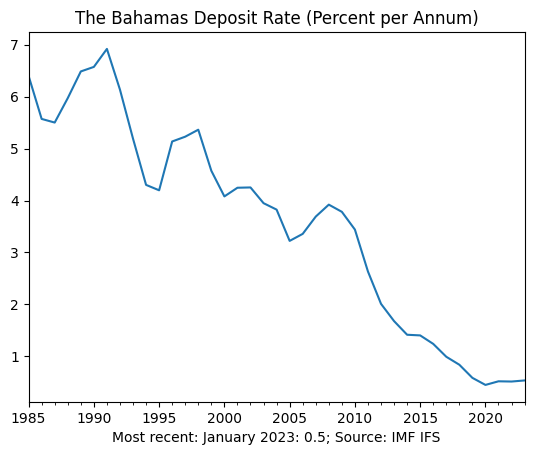

In [291]:

import requests # Python 3.6
import pandas as pd # pandas version 0.23

FREQUENCY = 'A' # 'M' for monthly, 'Q' for quarterly, 'A' for annual
COUNTRY = 'BS' # ISO country code
INDICATOR = 'FIDR_PA' # 'FIDR_PA' for Interest Rates, Deposit Interest

url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
key = f'CompactData/IFS/{FREQUENCY}.{COUNTRY}.{INDICATOR}'

# Navigate to series in API-returned JSON data
data = (requests.get(f'{url}{key}').json()
        ['CompactData']['DataSet']['Series'])

print(f"{COUNTRY} - {INDICATOR} - {FREQUENCY}")
print(data)

# Create pandas dataframe from the observations
data_list = [[obs.get('@TIME_PERIOD'), obs.get('@OBS_VALUE')] for obs in data['Obs']]

df = pd.DataFrame(data_list, columns=['date', 'value'])
df = df.set_index(pd.to_datetime(df['date']))['value'].astype('float')

# Save cleaned dataframe as a csv file
df.to_csv(f'data/{FREQUENCY}-{COUNTRY}-{INDICATOR}.csv', header=True)

# Title and text with recent value
title = 'The Bahamas Deposit Rate (Percent per Annum)'
recentdt = df.index[-1].strftime('%B %Y')
recentval = round(df[-1], 1)
recent = f'Most recent: {recentdt}: {recentval}'
source = 'Source: IMF IFS'

# Basic plot
plot = df.plot(title=title)
plot = plot.set_xlabel(f'{recent}; {source}')

In [ ]:
# EXAMPLE CODE IMF DATA API

# import pandas as pd          # pandas version 0.23

# baseyr = data['@BASE_YEAR']  # Save the base year

# # Create pandas dataframe from the observations
# data_list = [[obs.get('@TIME_PERIOD'), obs.get('@OBS_VALUE')]
#              for obs in data['Obs']]

# df = pd.DataFrame(data_list, columns=['date', 'value'])

# df = df.set_index(pd.to_datetime(df['date']))['value'].astype('float')

# # Save cleaned dataframe as a csv file
# df.to_csv('data/UK_import_price_index.csv', header=True)

# # Title and text with recent value
# title = f'U.K. Import Prices (index, {baseyr})'
# recentdt = df.index[-1].strftime('%B %Y')
# recentval = round(df[-1], 1)
# recent = f'Most recent: {recentdt}: {recentval}'
# source = 'Source: IMF IFS'

# # Basic plot
# plot = df.plot(title=title, colormap='Set1')
# plot = plot.set_xlabel(f'{recent}; {source}')